# Acne Detection using EfficientNet

## Training and Validation


### Importing Dependencies

In [1]:
# Import EfficientNetB0 model with pre-trained weights from Keras applications
from tensorflow.keras.applications import EfficientNetB0

# Import the Model class to build and manage our neural network
from tensorflow.keras.models import Model

# Import Dense and Flatten layers for building our custom layers
from tensorflow.keras.layers import Dense, Flatten

# Import ImageDataGenerator for data augmentation and preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Import Adam optimizer for compiling the model
from tensorflow.keras.optimizers import Adam

2024-08-03 22:16:37.115936: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-03 22:16:37.121907: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-03 22:16:37.142367: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-03 22:16:37.176279: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-03 22:16:37.184759: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-03 22:16:37.198928: I tensorflow/core/platform/cpu_feature_gu

### Load the pre-trained EfficientNetB0 model, excluding the top layers
Loading the pre-trained EfficientNetB0 model without its top layers lets you use its powerful feature-detecting abilities and then customize the final part to fit your specific task.


In [2]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

### Freeze the base model layers to prevent them from being updated during training
Freezing the base model layers prevents them from being updated during training so that their learned features remain intact.


In [3]:
for layer in base_model.layers:
    layer.trainable = False


### Add custom classification layers
Flatten the output from the EfficientNetB0 model to convert the 2D feature maps into a 1D vector


In [4]:
x = Flatten()(base_model.output)

### Add a Dense layer with 256 units and ReLU activation function

In [5]:
x = Dense(256, activation='relu')(x)

### Add a final Dense layer with a single unit and sigmoid activation function


In [6]:
x = Dense(1, activation='sigmoid')(x)

### Create the full model
Create a new Model object by specifying the input from the base EfficientNetB0 model and the output from the custom layers.


In [7]:
model = Model(inputs=base_model.input, outputs=x)

### Compile the model
Compile the model with the Adam optimizer, binary cross-entropy loss function, and accuracy as a metric.


In [8]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

### Data augmentation and generators for training and validation

In [9]:
# Create an ImageDataGenerator instance for the training dataset with data augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values to the range [0, 1]
    rotation_range=30,        # Randomly rotate images by up to 30 degrees
    shear_range=0.2,          # Apply random shearing transformations
    zoom_range=0.2,           # Apply random zoom
    horizontal_flip=True      # Randomly flip images horizontally
)

### Create an ImageDataGenerator instance for the validation dataset without data augmentation
val_datagen = ImageDataGenerator(rescale=1./255)

# Generate batches of augmented image data from the training directory
train_generator = train_datagen.flow_from_directory(
    "dataset/training/",     # Path to the training dataset directory
    target_size=(224, 224),  # Resize images to 224x224 pixels
    batch_size=32,           # Number of images to return in each batch
    class_mode='binary'      # Binary classification labels
)

# Generate batches of image data from the validation directory
val_generator = val_datagen.flow_from_directory(
    "dataset/validation/",   # Path to the validation dataset directory
    target_size=(224, 224),  # Resize images to 224x224 pixels
    batch_size=32,           # Number of images to return in each batch
    class_mode='binary'      # Binary classification labels
)


Found 1646 images belonging to 2 classes.
Found 112 images belonging to 2 classes.


### Train the Model

In [10]:
# Train the model using the training data generator and validate it using the validation data generator
model.fit(
    train_generator,          # Data generator for training images
    epochs=25,                # Number of epochs to train the model
    validation_data=val_generator  # Data generator for validation images to evaluate model performance
)


Epoch 1/25


/home/agbor/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


52/52 ━━━━━━━━━━━━━━━━━━━━ 270s 5s/step - accuracy: 0.5172 - loss: 1.1720 - val_accuracy: 0.5000 - val_loss: 0.7028
Epoch 2/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 243s 4s/step - accuracy: 0.4668 - loss: 0.7054 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 3/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 270s 4s/step - accuracy: 0.5293 - loss: 0.6946 - val_accuracy: 0.5000 - val_loss: 0.6967
Epoch 4/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 231s 4s/step - accuracy: 0.4805 - loss: 0.7043 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 236s 4s/step - accuracy: 0.4810 - loss: 0.7003 - val_accuracy: 0.5000 - val_loss: 0.7221
Epoch 6/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 225s 4s/step - accuracy: 0.5003 - loss: 0.7113 - val_accuracy: 0.5000 - val_loss: 0.7242
Epoch 7/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 277s 4s/step - accuracy: 0.4955 - loss: 0.7178 - val_accuracy: 0.5000 - val_loss: 0.7138
Epoch 8/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 247s 5s/step - accuracy: 0.4919 - loss: 0.7067 - val_accuracy: 0.5000 - val_loss: 0.

2024-08-03 23:48:39.076390: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-08-03 23:48:40.448879: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


52/52 ━━━━━━━━━━━━━━━━━━━━ 294s 5s/step - accuracy: 0.5094 - loss: 0.6960 - val_accuracy: 0.5000 - val_loss: 0.6997
Epoch 24/25


2024-08-03 23:52:49.757015: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-08-03 23:52:51.157769: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


52/52 ━━━━━━━━━━━━━━━━━━━━ 259s 5s/step - accuracy: 0.4947 - loss: 0.6953 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 25/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 223s 4s/step - accuracy: 0.4729 - loss: 0.7023 - val_accuracy: 0.5000 - val_loss: 0.7092


### Model Evaluation


### Create a data generator for the testing dataset

In [11]:
test_generator = val_datagen.flow_from_directory(
    "dataset/testing/",       # Path to the testing dataset directory
    target_size=(224, 224),   # Resize images to 224x224 pixels
    batch_size=32,            # Number of images to return in each batch
    class_mode='binary',      # Binary classification labels
    shuffle=False             # Do not shuffle the order of images for consistent evaluation
)

Found 96 images belonging to 2 classes.


### Evaluate the model's performance on the testing dataset

In [12]:
test_loss, test_accuracy = model.evaluate(test_generator)

3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 0.3125 - loss: 0.7767  


In [13]:
# Print the test accuracy and test loss
print(f"Test Accuracy: {test_accuracy:.2f}")  # Print the test accuracy
print(f"Test Loss: {test_loss:.2f}")         # Print the test loss


Test Accuracy: 0.50
Test Loss: 0.71


### Confusion Matrix

In [14]:
# Import functions for evaluating classification performance from scikit-learn
from sklearn.metrics import confusion_matrix, classification_report

# Get the true labels from the test generator
true_labels = test_generator.classes

# Generate predictions for the test dataset using the trained model
predictions = model.predict(test_generator)

# Convert the predicted probabilities to binary labels
predicted_labels = (predictions > 0.5).astype(int).reshape(-1)

# Compute the confusion matrix to evaluate the performance of the model
cm = confusion_matrix(true_labels, predicted_labels)
print(cm)

# Generate a classification report that includes precision, recall, and F1-score
print(classification_report(true_labels, predicted_labels))

3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step
[[ 0 48]
 [ 0 48]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.50      1.00      0.67        48

    accuracy                           0.50        96
   macro avg       0.25      0.50      0.33        96
weighted avg       0.25      0.50      0.33        96



/home/agbor/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/agbor/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/agbor/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Heatmap of Confusion Matrix


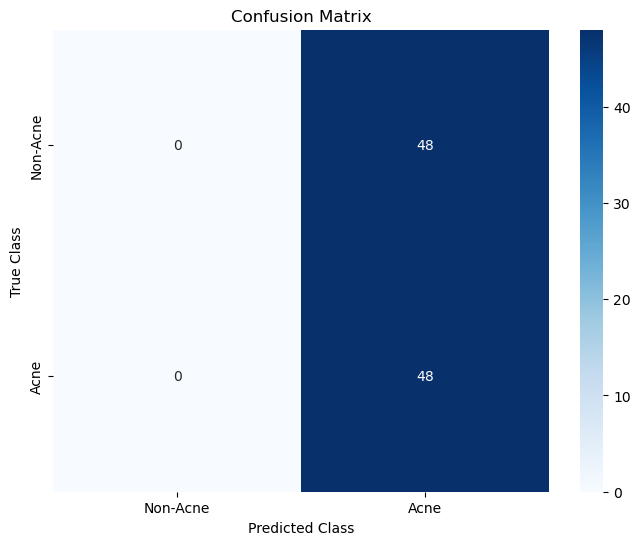

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class names
class_names = ['Non-Acne', 'Acne']

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

### ROC Curve and AUC (Area Under the Curve)


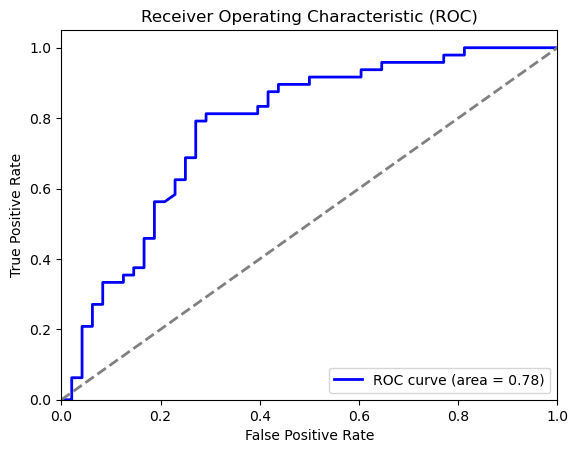

In [16]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(true_labels, predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


### Precision vs Recall vs F1-Score

/home/agbor/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/agbor/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/agbor/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


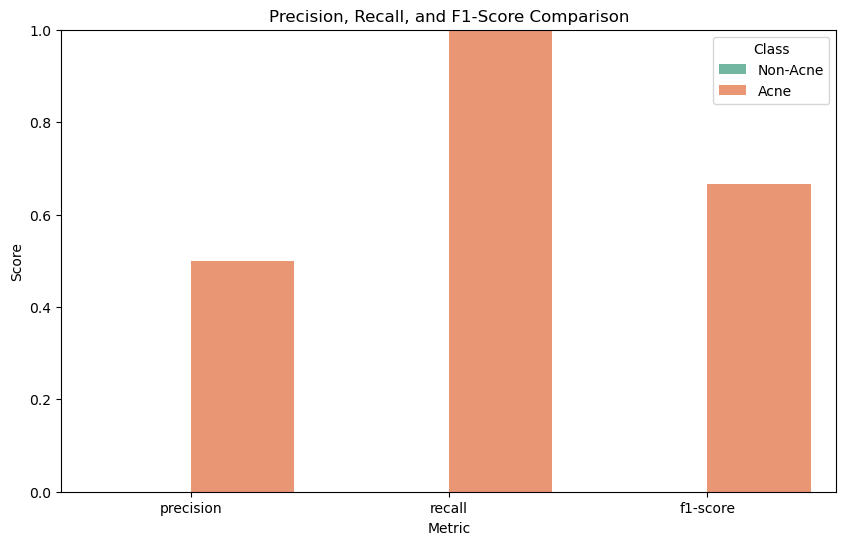

In [17]:
import pandas as pd

# Generate a classification report
report = classification_report(true_labels, predicted_labels, target_names=['Non-Acne', 'Acne'], output_dict=True)

# Extract Precision, Recall, and F1-Score for each class
metrics = ['precision', 'recall', 'f1-score']
classes = ['Non-Acne', 'Acne']
values = {metric: [report[class_name][metric] for class_name in classes] for metric in metrics}

# Convert to a format suitable for seaborn
metrics_data = []
for metric, scores in values.items():
    for score, class_name in zip(scores, classes):
        metrics_data.append({'Metric': metric, 'Class': class_name, 'Score': score})

# Create a DataFrame
df_metrics = pd.DataFrame(metrics_data)

# Plot the metrics
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Class', data=df_metrics, palette='Set2')
plt.title('Precision, Recall, and F1-Score Comparison')
plt.ylim(0, 1)  # All metrics are between 0 and 1
plt.ylabel('Score')
plt.show()


### Matthews Correlation Coefficient (MCC)

In [18]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(true_labels, predicted_labels)
print(f'MCC: {mcc:.2f}')

MCC: 0.00


### Making predictions using a single image

In [19]:
# Import necessary libraries
import numpy as np  # For numerical operations
from tensorflow.keras.preprocessing import image  # For image preprocessing
from tensorflow.keras.applications.vgg16 import preprocess_input  # For VGG16-specific preprocessing
from tensorflow.keras.models import load_model  # For loading a saved model

# Load and preprocess the image
img_path = "dataset/testing/acne/acne-7_jpeg.rf.34ee37b930f592f787bb8d1bf6b37d30.jpg"  # Path to the image file
img = image.load_img(img_path, target_size=(224, 224))  # Load the image and resize it to 224x224 pixels
img_array = image.img_to_array(img)  # Convert the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension (1, 224, 224, 3)
img_array = preprocess_input(img_array)  # Apply VGG16-specific preprocessing (scaling pixel values)

# Make a prediction using the trained model
prediction = model.predict(img_array)  # Get the predicted probability from the model
prediction_class = (prediction > 0.5).astype(int)  # Convert probability to binary class label

# Map prediction to class label
class_labels = ['Non-Acne', 'Acne']  # Define the class labels
predicted_label = class_labels[prediction_class[0][0]]  # Get the predicted class label

# Print the predicted class label
print(f'Predicted Label: {predicted_label}')  # Output the predicted label


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Predicted Label: Non-Acne


### Saving the Model

In [25]:
from tensorflow.keras.models import save_model

# Assuming `model` is your trained Keras model
model.save('EfficientNetModel.h5')  # Save model to HDF5 file
